# Cluster Analysis

Disclaimer, this tutorial is provided via the book of Tan et. al and is available online [here](http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial8/tutorial8.ipynb).

Cluster analysis seeks to partition the input data into groups of closely related instances so that instances that belong to the same cluster are more similar to each other than to instances that belong to other clusters. In this tutorial, we will provide examples of using different clustering techniques provided by the scikit-learn library package. 


## 1 K-means Clustering

The k-means clustering algorithm represents each cluster by its corresponding cluster centroid. The algorithm would partition the input data into *k* disjoint clusters by iteratively applying the following two steps:
1. Form *k* clusters by assigning each instance to its nearest centroid.
2. Re-compute the centroid of each cluster.

In this section, we perform k-means clustering on a toy example of movie ratings dataset. We first create the dataset as follows.


In [1]:
import pandas as pd

ratings = [['john',5,5,2,1],['mary',4,5,3,2],['bob',4,4,4,3],['lisa',2,2,4,5],['lee',1,2,3,4],['harry',2,1,5,5]]
titles = ['user','Jaws','Star Wars','Exorcist','Omen']
movies = pd.DataFrame(ratings,columns=titles)
movies

,user,Jaws,Star Wars,Exorcist,Omen
0,john,5,5,2,1
1,mary,4,5,3,2
2,bob,4,4,4,3
3,lisa,2,2,4,5
4,lee,1,2,3,4
5,harry,2,1,5,5


In this example dataset, the first 3 users liked action movies (Jaws and Star Wars) while the last 3 users enjoyed horror movies (Exorcist and Omen). Our goal is to apply k-means clustering on the users to identify groups of users with similar movie preferences.

The example below shows how to apply k-means clustering (with k=2) on the movie ratings data. We must remove the "user" column first before applying the clustering algorithm. The cluster assignment for each user is displayed as a data frame object.

In [ ]:
from sklearn import cluster

data = movies.drop('user',axis=1)
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data) 
labels = k_means.labels_
pd.DataFrame(labels, index=movies.user, columns=['Cluster ID'])

The k-means clustering algorithm assigns the first three users to one cluster and the last three users to the second cluster. The results are consistent with our expectation. We can also display the centroid for each of the two clusters.

In [ ]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

Observe that cluster 0 has higher ratings for the horror movies whereas cluster 1 has higher ratings for action movies. The cluster centroids can be applied to other users to determine their cluster assignments. 

In [4]:
import numpy as np

testData = np.array([[4,5,1,2],[3,2,4,4],[2,3,4,1],[3,2,3,3],[5,4,1,4]])
labels = k_means.predict(testData)
labels = labels.reshape(-1,1)
usernames = np.array(['paul','kim','liz','tom','bill']).reshape(-1,1)
cols = movies.columns.tolist()
cols.append('Cluster ID')
newusers = pd.DataFrame(np.concatenate((usernames, testData, labels), axis=1),columns=cols)
newusers

,user,Jaws,Star Wars,Exorcist,Omen,Cluster ID
0,paul,4,5,1,2,1
1,kim,3,2,4,4,0
2,liz,2,3,4,1,1
3,tom,3,2,3,3,0
4,bill,5,4,1,4,1


To determine the number of clusters in the data, we can apply k-means with varying number of clusters from 1 to 6 and compute their corresponding sum-of-squared errors (SSE) as shown in the example below. The "elbow" in the plot of SSE versus number of clusters can be used to estimate the number of clusters.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('K: Number of Clusters')
plt.ylabel('SSE')
plt.savefig('figures\elbow method.png')

## 2 Hierarchical Clustering

This section demonstrates examples of applying hierarchical clustering to the vertebrate dataset used in Module 6 (Classification). Specifically, we illustrate the results of using 3 hierarchical clustering algorithms provided by the Python scipy library: (1) single link (MIN), (2) complete link (MAX), and (3) group average. Other hierarchical clustering algorithms provided by the library include centroid-based and Ward's method.
You will need to download the vertebrate dataset from [here](https://leeds365-my.sharepoint.com/:x:/g/personal/scsaalt_leeds_ac_uk/EcvVlLinFT5En_LIGMOXBQgBoqC7duQjKC04Bsb1QcfWdA?e=gHw04h) and store in a subfolder folder called 'datasets' in the same folder of this notebook.

In [18]:
import pandas as pd

data = pd.read_csv("vertebrate.tsv", delimiter="\t")
data = data[:9]
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals


### 2.1 Single Link (MIN)

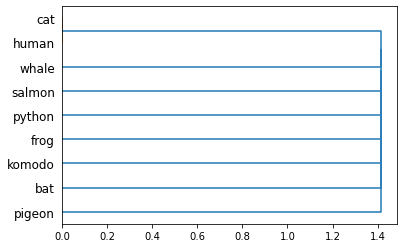

In [19]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

names = data['Name']
Y = data['Class']
X = data.drop(['Name','Class'],axis=1)
Z = hierarchy.linkage(X.values, 'single')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

### 2.2 Complete Link (MAX)

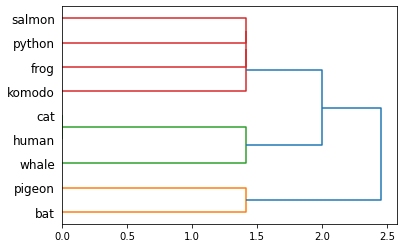

In [20]:
Z = hierarchy.linkage(X.values, 'complete')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

### 3.3 Group Average

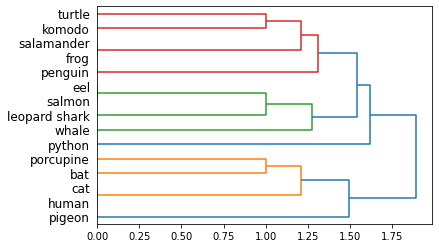

In [13]:
Z = hierarchy.linkage(X.values, 'average')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')